2024.07.01 (월) - DAY1 데이터의 활용 및 구현 1 / 이론 실습

## 1. 데이터 수집 예시 (스크래핑)

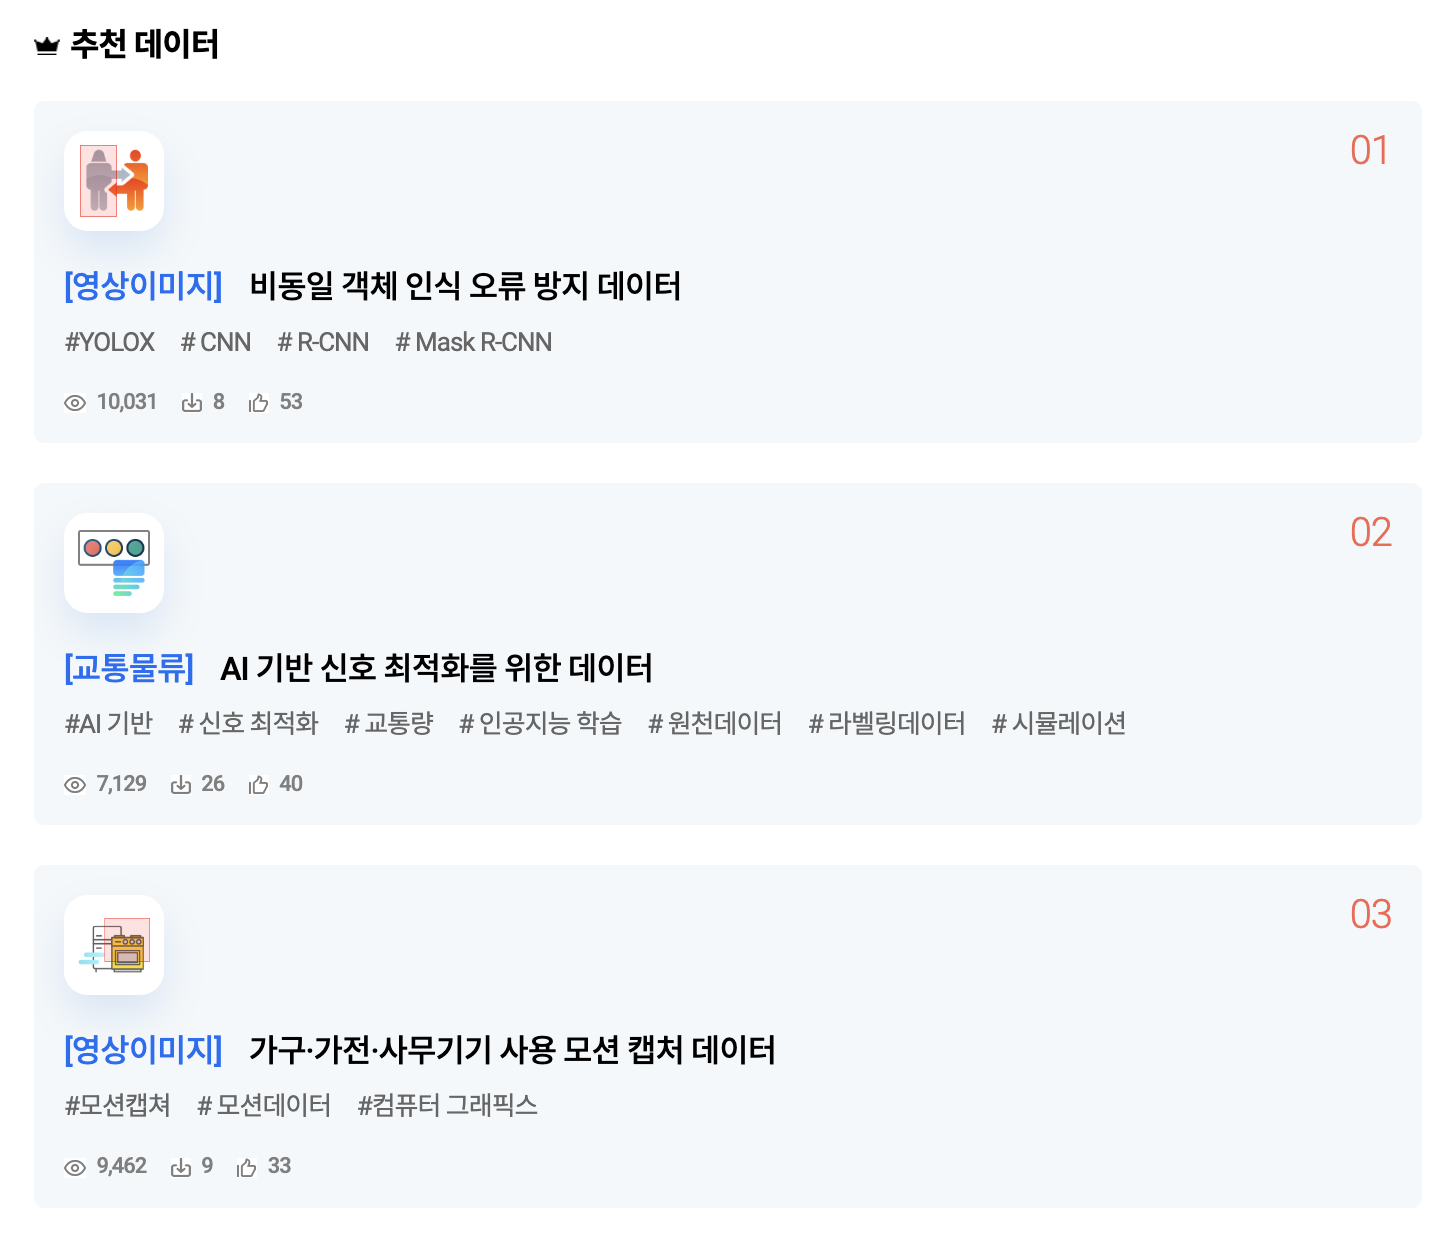

In [ ]:
import requests
from bs4 import BeautifulSoup

# AI Hub 페이지 URL
url = 'https://www.aihub.or.kr/'

# 웹 페이지 요청
response = requests.get(url)
response.raise_for_status() # 요청이 성공했는지 확인

# BeautifulSoup 객체 생성
soup = BeautifulSoup(response.content, 'html.parser')

# 인기 데이터 TOP3 섹션 찾기
top3_section = soup.find('div', class_ = 'secR')

# 각 데이터 항목 추출
data_list = top3_section.find_all('div', class_='list')

# 데이터 제목 추출
titles = []
for data in data_list:
    title = data.find('h3').get_text(strip=True)
    clean_title = title.split(']')[-1].strip()
    titles.append(clean_title)

# 추출한 데이터 출력
for idx, title in enumerate(titles, start=1):
    print(f"TOP {idx}: {title}")

TOP 1: 비동일 객체 인식 오류 방지 데이터
TOP 2: AI 기반 신호 최적화를 위한 데이터
TOP 3: 가구·가전·사무기기 사용 모션 캡처 데이터


이 코드는 AI Hub 웹사이트에서 인기 데이터 TOP 3 섹션의 제목을 추출하여 출력합니다.

1. **라이브러리 임포트**: 웹 페이지 요청을 위해 `requests`를, HTML 파싱을 위해 `BeautifulSoup`를 임포트합니다.
2. **웹 페이지 요청**: 지정된 URL('https://www.aihub.or.kr/')에 HTTP GET 요청을 보내고, 응답이 성공적(상태 코드 200)인지 확인합니다.
3. **HTML 파싱**: 응답받은 웹 페이지 내용을 `BeautifulSoup` 객체로 변환하여 HTML 파싱을 준비합니다.
4. **인기 데이터 섹션 찾기**: 'secR' 클래스를 가진 `div` 요소를 찾아 인기 데이터 TOP 3 섹션을 식별합니다.
5. **데이터 항목 추출**: 섹션 내에서 'list' 클래스를 가진 모든 `div` 요소를 찾아 각 인기 데이터를 리스트로 추출합니다.
6. **데이터 제목 정리**: 각 데이터 항목에서 제목을 추출하고 불필요한 부분을 제거하여 정리된 제목 리스트를 생성합니다.
7. **결과 출력**: 정리된 제목 리스트를 순서대로 출력하여 인기 데이터 TOP 3의 제목을 표시합니다.

AI Hub 웹페이지에서 특정 섹션 내에 있는 데이터 제목을 추출하고, 불필요한 부분을 제거하여 정리하는 작업을 수행합니다.


1. **빈 리스트 생성**:
    
    ```python
    titles = []
    ```
    
    - 제목을 저장할 빈 리스트 `titles`를 생성합니다.
2. **데이터 항목 반복 처리**:
    
    ```python
    for data in data_list:
    ```
    
    - `data_list`에 있는 각 데이터 항목을 하나씩 반복 처리합니다.
    - `data_list`는 이전 단계에서 'list' 클래스를 가진 `div` 요소들로 구성된 리스트입니다.
3. **제목 추출**:
    
    ```python
    title = data.find('h3').get_text(strip=True)
    ```
    
    - `data` 항목에서 `h3` 태그를 찾아 그 안의 텍스트를 추출합니다.
    - `get_text(strip=True)`는 텍스트에서 앞뒤 공백을 제거하고 문자열로 반환합니다.
        - 예: `"<h3>[인기] 데이터 제목</h3>"` => `"데이터 제목"`
4. **불필요한 부분 제거**:
    
    ```python
    clean_title = title.split(']')[-1].strip()
    ```
    
    - `title.split(']')`는 `title` 문자열을 `']'` 문자를 기준으로 분리하여 리스트로 만듭니다.
        - 예: `"[인기] 데이터 제목"` => `['[인기', ' 데이터 제목']`
    - `[-1]`은 리스트의 마지막 요소를 선택합니다.
        - 예: `['[인기', ' 데이터 제목']` => `' 데이터 제목'`
    - `strip()`은 앞뒤 공백을 제거합니다.
        - 예: `' 데이터 제목'` => `'데이터 제목'`
5. **정리된 제목 리스트에 추가**:
    
    ```python
    titles.append(clean_title)
    ```
    
    - 정리된 제목 `clean_title`을 `titles` 리스트에 추가합니다.

이 과정은 `data_list`의 각 항목에 대해 반복되어, 최종적으로 모든 데이터 항목의 정리된 제목들이 `titles` 리스트에 저장됩니다. 이 리스트는 이후에 인기 데이터 TOP 3의 제목을 출력하는 데 사용됩니다.

## 2. requests 라이브러리 및 BeautifulSoup 사용 예제

In [ ]:
import requests
from bs4 import BeautifulSoup

# 1. 웹 페이지 요청
url = 'https://ko.wikipedia.org/wiki/위키백과:대문'
response = requests.get(url)

# 2. 요청이 성공했는지 확인
if response.status_code == 200:
    # 3. BeautifulSoup 객체 생성
    soup = BeautifulSoup(response.content, 'html.parser')

    # 4. 페이지 제목 추출
    title = soup.find('h1', id='firstHeading').text
    print(f"Title: {title}")

    # 첫 번째 단락 추출
    first_paragraph = soup.find('p').text
    print(f"First paragraph: {first_paragraph}")
else:
    print(f"Failed to retrieve the web page. Status code: {response.status_code}")

Title: 위키백과:대문
First paragraph:  위키백과



## 3. Selenium 라이브러리 사용예제

In [ ]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.5 MB/s eta 0:00:00


In [ ]:
from selenium import webdriver
from selenium.webdriber.common.by import By